In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.columns=['Age', 'EstimatedSalary', 'Purchased']

In [4]:
df.sample(10)

,Age,EstimatedSalary,Purchased
18,46,28000,1
78,28,87000,0
195,34,43000,0
382,44,139000,1
383,49,28000,1
193,19,70000,0
351,37,75000,0
207,52,114000,0
273,39,106000,1
318,45,32000,1


In [5]:
df.shape

(400, 3)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

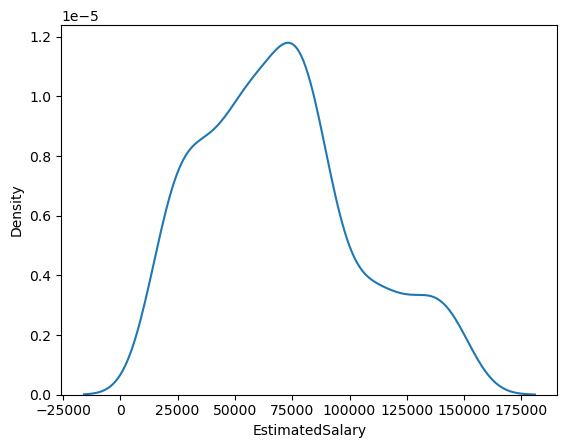

In [6]:
sns.kdeplot(df['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

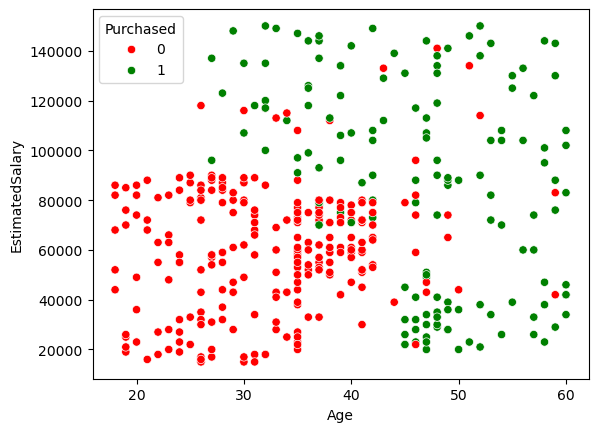

In [7]:
color_dict={0: 'red', 1: 'green'}
sns.scatterplot(x = df['Age'], y = df['EstimatedSalary'],hue=df['Purchased'],palette=color_dict)

# Train Test Split

In [8]:
from sklearn. model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

# Min Max Scaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn what is the mean and standard deviation of the actual data
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
X_train_scaled

,Age,EstimatedSalary
0,0.190476,0.000000
1,1.000000,0.644444
2,0.476190,0.718519
3,0.523810,0.681481
4,0.571429,0.281481
...,...,...
275,0.714286,0.111111
276,0.261905,0.207407
277,0.428571,0.274074
278,0.214286,0.288889


In [15]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [16]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


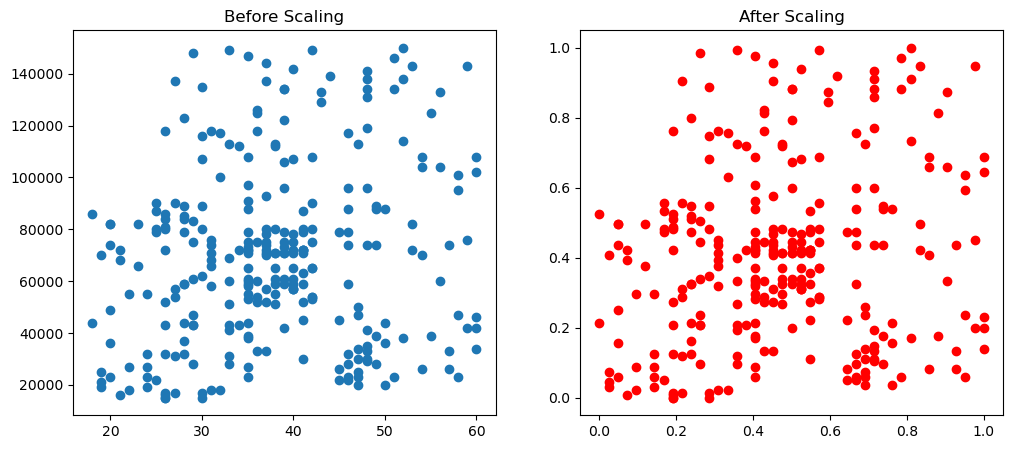

In [17]:
fig, (ax1, ax2) = plt. subplots(ncols=2, figsize= (12, 5))
ax1.scatter(X_train['Age'], X_train[ 'EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter (X_train_scaled[ 'Age'], X_train_scaled[ 'EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

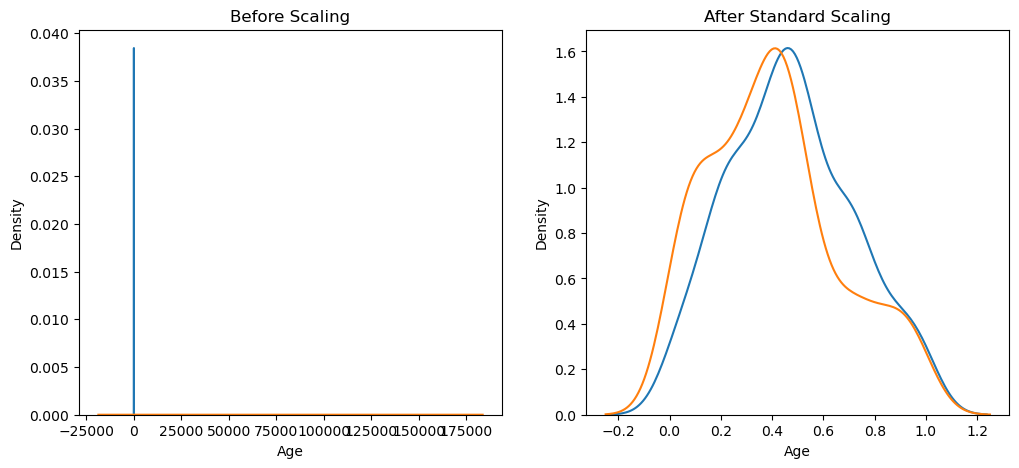

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title( 'Before Scaling')
sns.kdeplot(X_train[ 'Age'], ax=ax1)
sns. kdeplot(X_train[ 'EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title( 'After Standard Scaling') 
sns. kdeplot(X_train_scaled[ 'Age'], ax=ax2)
sns. kdeplot(X_train_scaled[ 'EstimatedSalary'], ax=ax2)
plt. show()

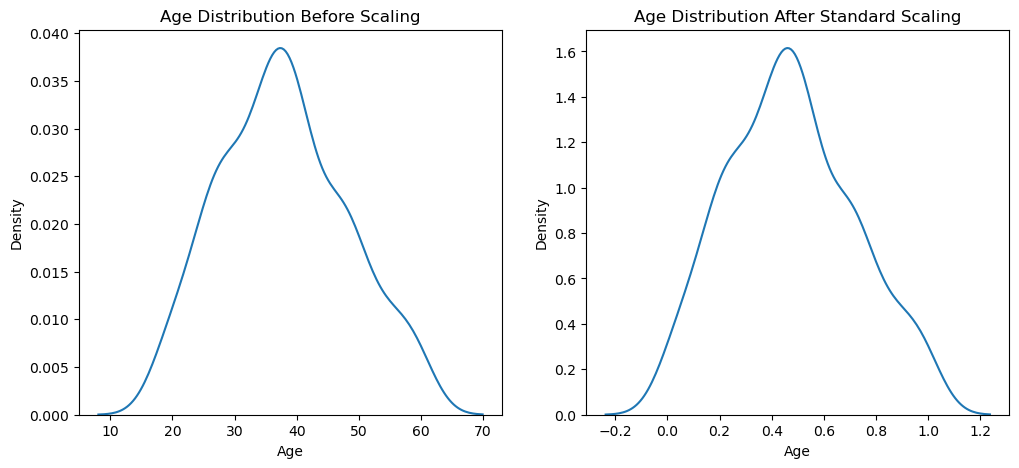

In [19]:
# NOTE: The standard deviation of the features remain the same only their scales change after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling') 
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling') 
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

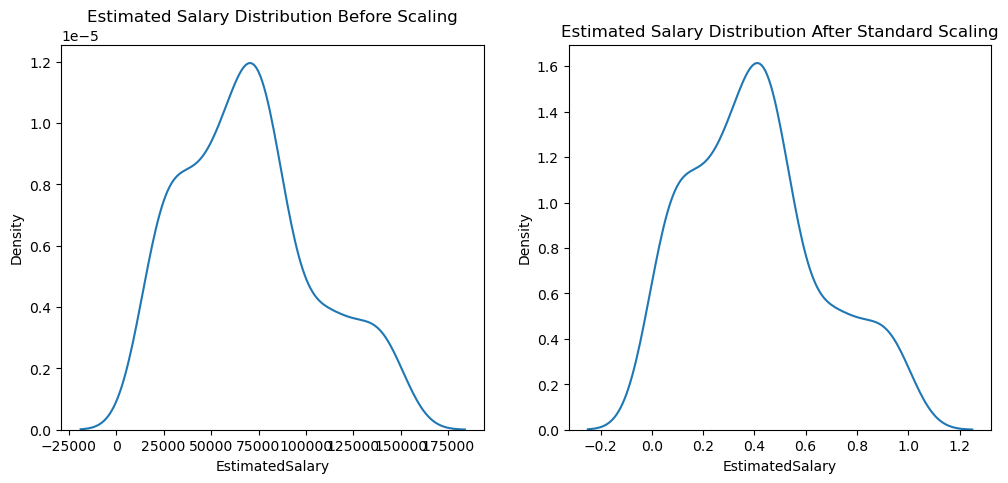

In [20]:
# NOTE: The standard deviation of the features remain the same only their scales change after scaling (although
# their might be some changes in the shape of the distribution)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Estimated Salary Distribution Before Scaling') 
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Estimated Salary Distribution After Standard Scaling') 
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()